## Tutorial: Classificação com algoritmo Decision Tree (Árvore de decisão)

##### Autora: Profa. Rosana Rego


Passo 01: Importar as bibliotecas necessárias

In [1]:
import pandas as pd #Para trabalhar com dataframes               
import numpy as np #Para trabalhar com arrays
import matplotlib.pyplot as plt #Para plotar os gráficos
from sklearn.tree import DecisionTreeClassifier #Para criar o modelo de árvore de decisão
from sklearn.model_selection import train_test_split #Para dividir o dataset em treino e teste

Passo 02: Abrir o dataset que será utilizado

In [2]:
dataset = pd.read_csv('..\euthyroid_sick_syndrome\datasets\euthyroid\euthyroid_final_dataset.csv')
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: '..\\euthyroid_sick_syndrome\\datasets\\euthyroid\\euthyroid_final_dataset.csv'

Passo 03: Obter os dados de entrada e saída (labels)

In [ ]:
output_label_dataset = dataset['classification']
dataset = dataset.drop(['classification'], axis=1)

In [ ]:
print(output_label_dataset.value_counts()) #1 = sick, 0 = normal

0    2870
1     292
Name: classification, dtype: int64


Passo 03: Selecionar as features que serão introduzidas no modelo

1. Visualizar a correlação entre os parâmetros do dataset 

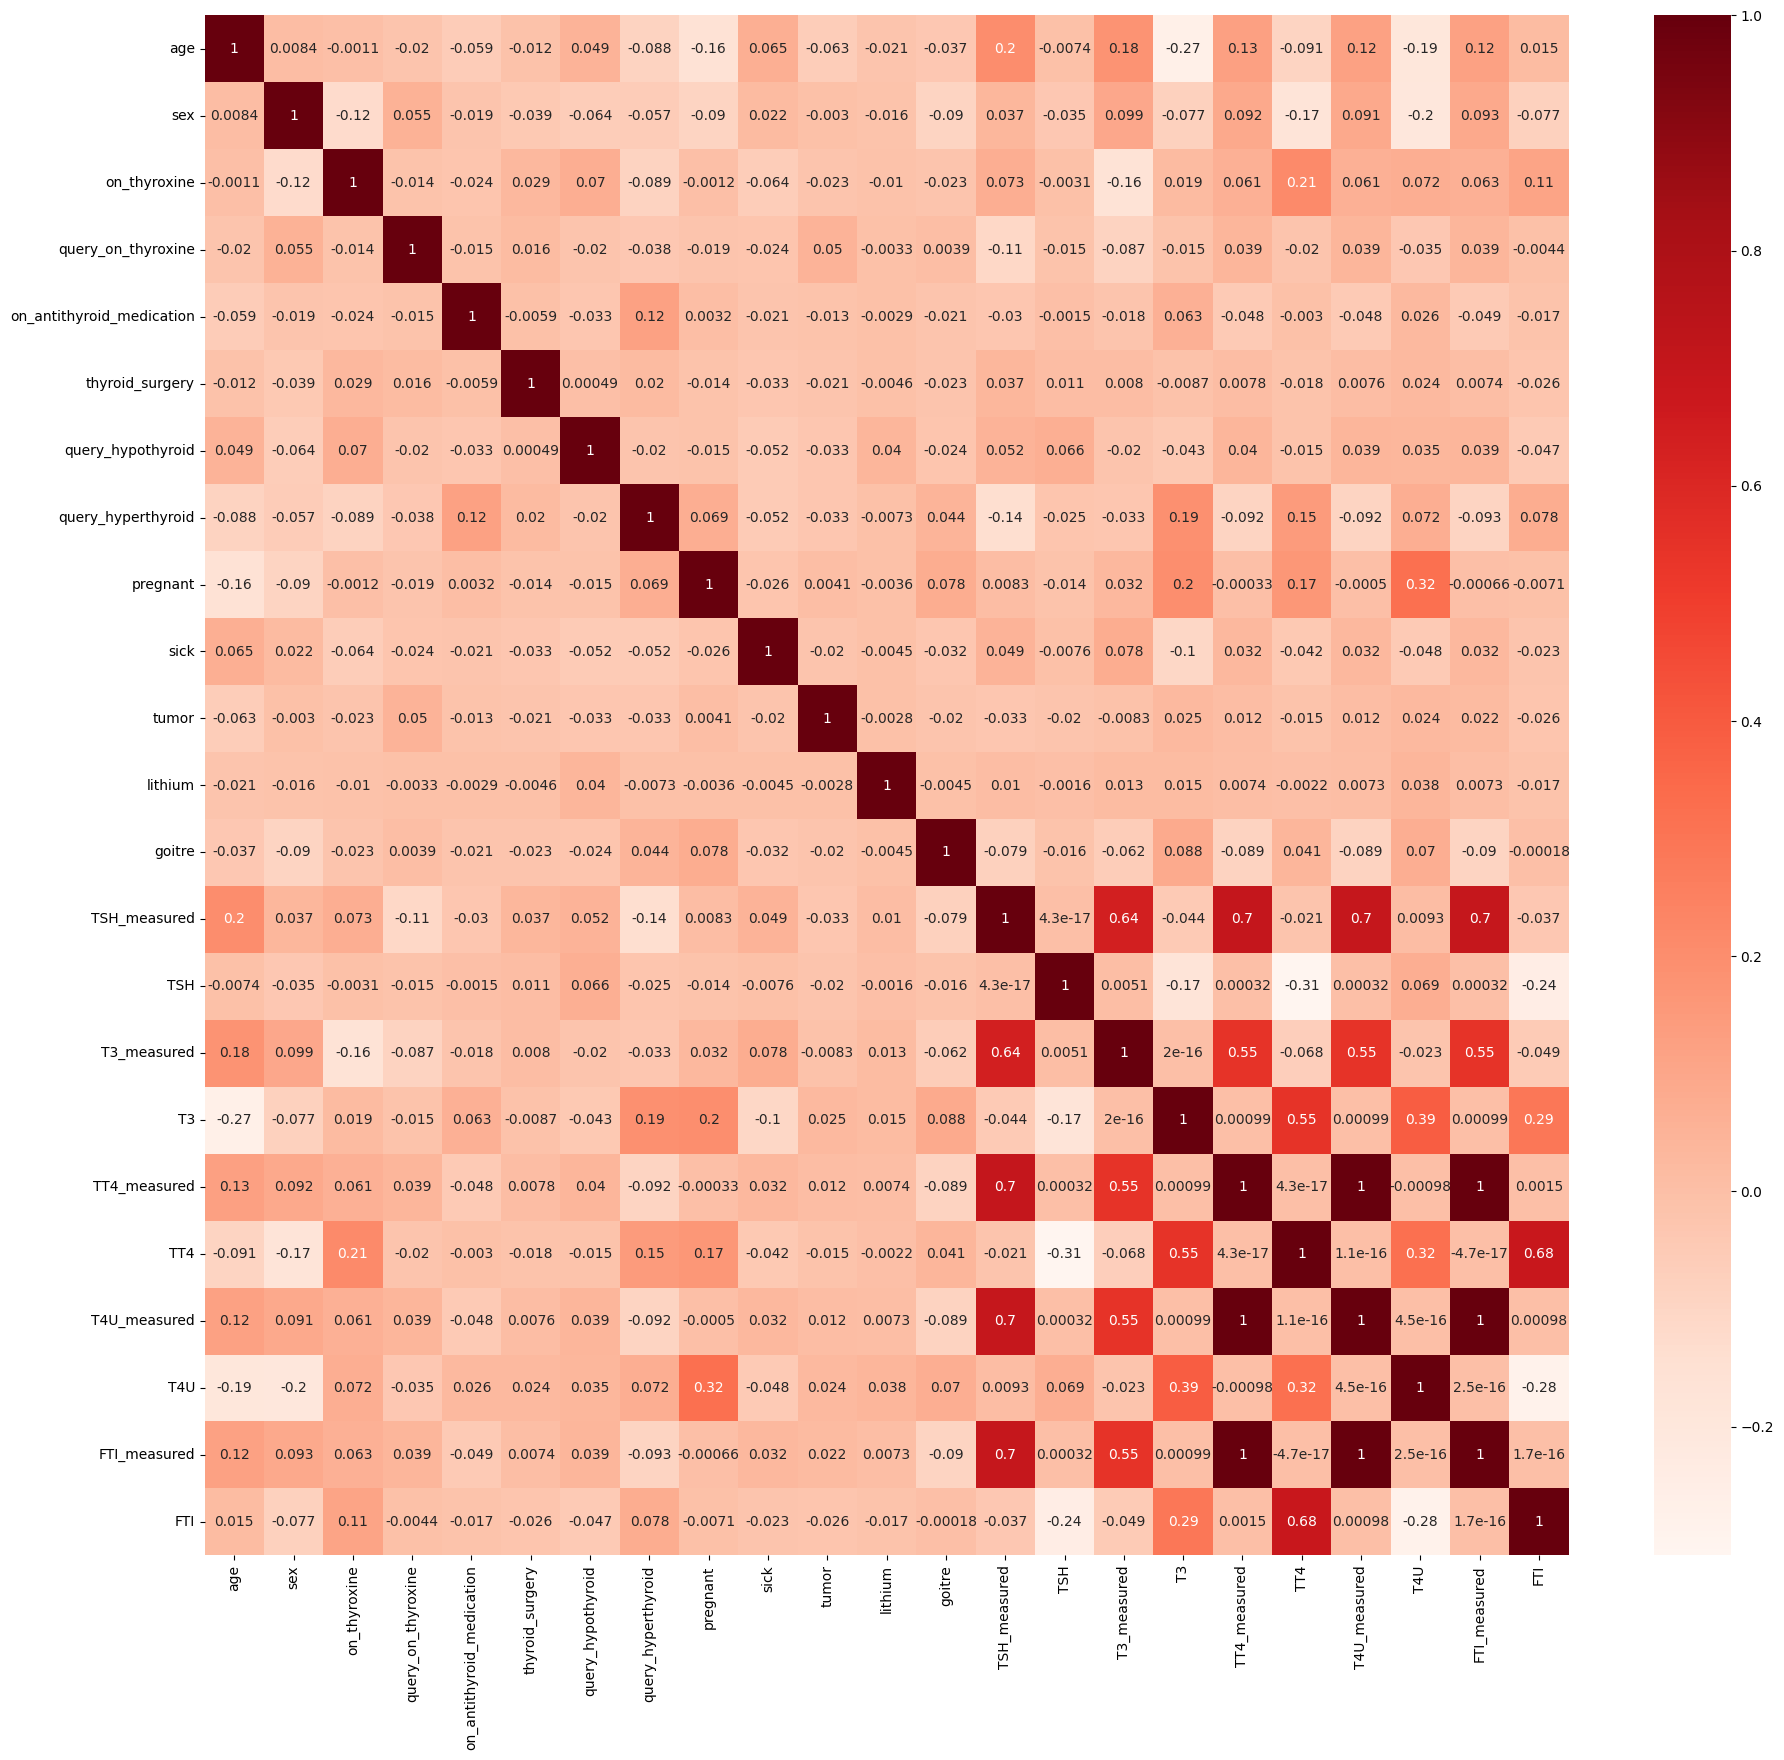

In [ ]:
#Pearson Correlation
import seaborn as sns
plt.figure(figsize=(22,20))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Passo 05: Balanceamento do dataset 
 com SMOTE (Synthetic Minority Over-Sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
dataset_res, ouput_label = sm.fit_resample(dataset, output_label_dataset)

In [ ]:
ouput_label.value_counts()

1    2870
0    2870
Name: classification, dtype: int64

In [ ]:
dataset_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5740 entries, 0 to 5739
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5740 non-null   int64  
 1   sex                        5740 non-null   int64  
 2   on_thyroxine               5740 non-null   int64  
 3   query_on_thyroxine         5740 non-null   int64  
 4   on_antithyroid_medication  5740 non-null   int64  
 5   thyroid_surgery            5740 non-null   int64  
 6   query_hypothyroid          5740 non-null   int64  
 7   query_hyperthyroid         5740 non-null   int64  
 8   pregnant                   5740 non-null   int64  
 9   sick                       5740 non-null   int64  
 10  tumor                      5740 non-null   int64  
 11  lithium                    5740 non-null   int64  
 12  goitre                     5740 non-null   int64  
 13  TSH_measured               5740 non-null   int64

Passo 06: Dividir o dataset em conjunto de treino e teste 

In [ ]:
#80 % para treino e 20% para teste
input_train, input_test, output_train, output_test = train_test_split(dataset_res, ouput_label, test_size=0.2, random_state=23)

In [ ]:
print("Treino:", input_train.shape, output_train.shape)
print("Teste:", input_test.shape, output_test.shape)

Treino: (4592, 23) (4592,)
Teste: (1148, 23) (1148,)


In [ ]:
# Classes para teste
output_test.value_counts()

0    588
1    560
Name: classification, dtype: int64

Passo 07: Treinar o modelo e introduzir os dados no modelo

In [ ]:
# Modelo de árvore de decisão
model= DecisionTreeClassifier ()
model.fit(input_train, output_train) #Treinamento

# Fazer a classificação 
output_model_decision = model.predict(input_test)

Passo 08: Resultado

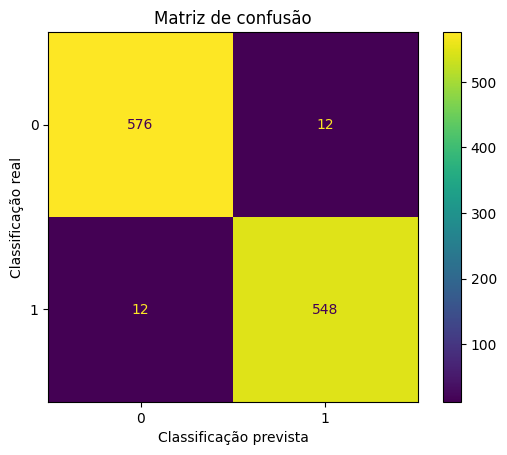

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(output_test, output_model_decision)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()

Existem 588 itens classificados na classe 0 (normal):

    - 576 desses itens estão corretamente classificados na classe 0.
    - 12 desses itens estão incorretamente classificados na classe 1

Existem 560 itens classificados na classe 1 (doente):

    - 12 desses itens estão incorretamente classificados na classe 0 normal.
    - 548 desses itens estão corretamente classificados na classe 1 doente.
